In [1]:
#importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from collections import Counter
import xgboost


In [40]:
#importing the data

data = pd.read_csv('traffic volume.csv')


In [41]:
#displaying first 5 rows of the data
data.head()

,holiday,temp,rain,snow,weather,date,Time,traffic_volume
0,NaN,288.28,0.0,0.0,Clouds,02-10-2012,09:00:00,5545
1,NaN,289.36,0.0,0.0,Clouds,02-10-2012,10:00:00,4516
2,NaN,289.58,0.0,0.0,Clouds,02-10-2012,11:00:00,4767
3,NaN,290.13,0.0,0.0,Clouds,02-10-2012,12:00:00,5026
4,NaN,291.14,0.0,0.0,Clouds,02-10-2012,13:00:00,4918


In [42]:
#used to display the basic information of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48151 non-null  float64
 2   rain            48202 non-null  float64
 3   snow            48192 non-null  float64
 4   weather         48155 non-null  object 
 5   date            48204 non-null  object 
 6   Time            48204 non-null  object 
 7   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 2.9+ MB


In [43]:
# used to display the null values of the data

data.isnull().sum()

holiday           48143
temp                 53
rain                  2
snow                 12
weather              49
date                  0
Time                  0
traffic_volume        0
dtype: int64

In [44]:
data['temp'].fillna(data['temp'].mean(),inplace=True)
data['rain'].fillna(data['rain'].mean(),inplace=True)
data['snow'].fillna(data['snow'].mean(),inplace=True)

print(Counter(data['weather']))

Counter({'Clouds': 15144, 'Clear': 13383, 'Mist': 5942, 'Rain': 5665, 'Snow': 2875, 'Drizzle': 1818, 'Haze': 1359, 'Thunderstorm': 1033, 'Fog': 912, nan: 49, 'Smoke': 20, 'Squall': 4})


In [45]:
data['weather'].fillna('Clouds',inplace=True)

In [46]:
#splitting the date column into year,month,day
data[["day", "month", "year"]] = data["date"].str.split("-", expand = True)

In [47]:
#splitting the Time column into hour,minute,second
data[["hours", "minutes", "seconds"]] = data["Time"].str.split(":", expand = True)

In [48]:
data.drop(columns=['date','Time'],axis=1,inplace=True)

In [49]:
data.head()

,holiday,temp,rain,snow,weather,traffic_volume,day,month,year,hours,minutes,seconds
0,NaN,288.28,0.0,0.0,Clouds,5545,02,10,2012,09,00,00
1,NaN,289.36,0.0,0.0,Clouds,4516,02,10,2012,10,00,00
2,NaN,289.58,0.0,0.0,Clouds,4767,02,10,2012,11,00,00
3,NaN,290.13,0.0,0.0,Clouds,5026,02,10,2012,12,00,00
4,NaN,291.14,0.0,0.0,Clouds,4918,02,10,2012,13,00,00


In [50]:
#used to understand the descriptive analysis of the data
data.describe()

,temp,rain,snow,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205351,0.334278,0.000222,3259.818355
std,13.336338,44.789133,0.008168,1986.860670
min,0.000000,0.000000,0.000000,0.000000
25%,272.180000,0.000000,0.000000,1193.000000
50%,282.429000,0.000000,0.000000,3380.000000
75%,291.800000,0.000000,0.000000,4933.000000
max,310.070000,9831.300000,0.510000,7280.000000


In [51]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [52]:
data['holiday_v2'] = label_encoder.fit_transform(data['holiday'])

In [53]:
data['weather_v2']= label_encoder.fit_transform(data['weather']) 
print(label_encoder.classes_)
data['weather_v2'].unique()

['Clear' 'Clouds' 'Drizzle' 'Fog' 'Haze' 'Mist' 'Rain' 'Smoke' 'Snow'
 'Squall' 'Thunderstorm']


array([ 1,  0,  6,  2,  5,  4,  3, 10,  8,  9,  7])

In [54]:
cor = data.select_dtypes(include='number').corr()
cor

,temp,rain,snow,traffic_volume,holiday_v2,weather_v2
temp,1.000000,0.009070,-0.019758,0.130034,0.004646,-0.033559
rain,0.009070,1.000000,-0.000090,0.004714,0.000177,0.009542
snow,-0.019758,-0.000090,1.000000,0.000735,0.000863,0.036662
traffic_volume,0.130034,0.004714,0.000735,1.000000,0.038057,-0.040035
holiday_v2,0.004646,0.000177,0.000863,0.038057,1.000000,-0.001851
weather_v2,-0.033559,0.009542,0.036662,-0.040035,-0.001851,1.000000


<Axes: >

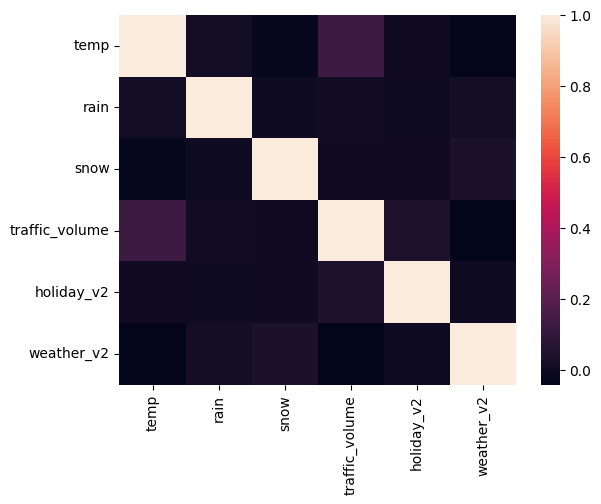

In [55]:
sns.heatmap(cor)

<Axes: xlabel='count', ylabel='weather'>

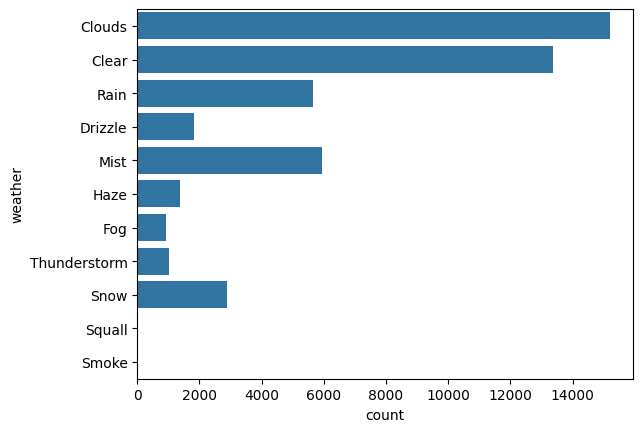

In [56]:
sns.countplot(data['weather'])

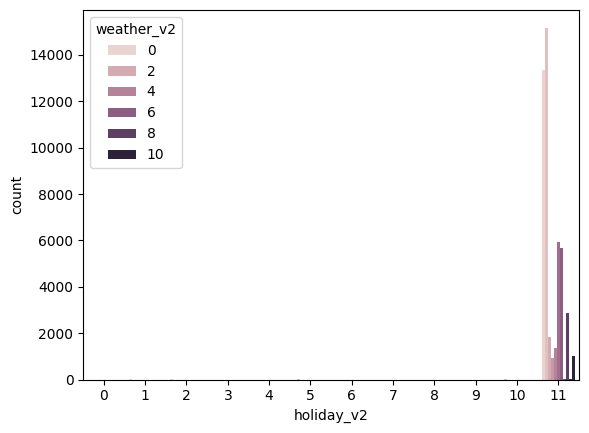

In [57]:
sns.countplot(x='holiday_v2', hue='weather_v2', data=data)
plt.show()


c:\Users\sunil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


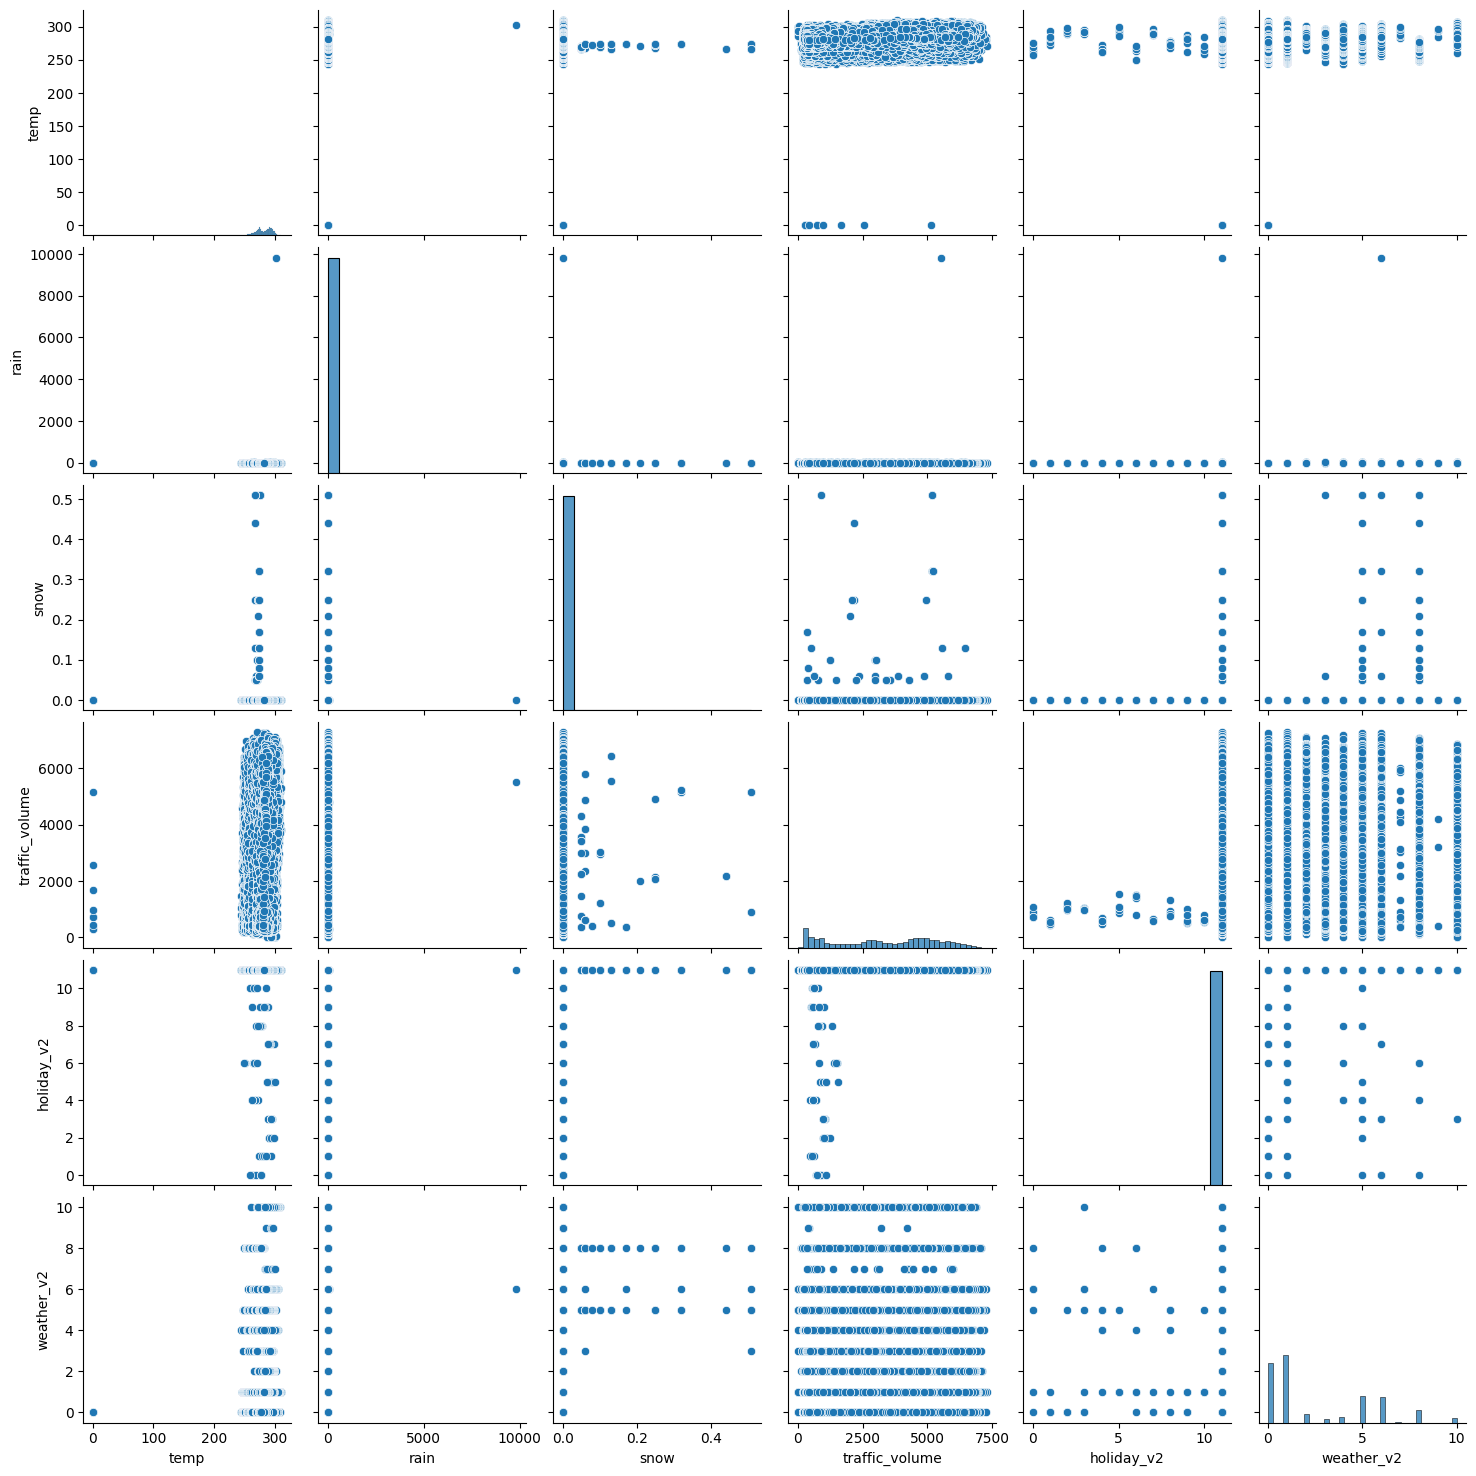

In [58]:
sns.pairplot(data)

<Axes: >

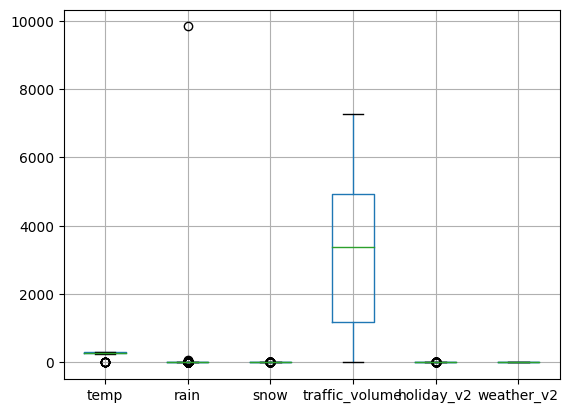

In [59]:
data.boxplot()

In [60]:
y = data['traffic_volume']
x = data.drop(columns=['traffic_volume','holiday','weather'],axis=1)

In [61]:
names = x.columns

In [62]:
from sklearn.preprocessing import scale

In [63]:
x = scale(x) 

In [64]:
x = pd.DataFrame(x,columns=names)

In [65]:
x.head()

,temp,rain,snow,day,month,year,hours,minutes,seconds,holiday_v2,weather_v2
0,0.530485,-0.007463,-0.027235,-1.574903,1.02758,-1.855294,-0.345548,0.0,0.0,0.031687,-0.566452
1,0.611467,-0.007463,-0.027235,-1.574903,1.02758,-1.855294,-0.201459,0.0,0.0,0.031687,-0.566452
2,0.627964,-0.007463,-0.027235,-1.574903,1.02758,-1.855294,-0.057371,0.0,0.0,0.031687,-0.566452
3,0.669205,-0.007463,-0.027235,-1.574903,1.02758,-1.855294,0.086718,0.0,0.0,0.031687,-0.566452
4,0.744939,-0.007463,-0.027235,-1.574903,1.02758,-1.855294,0.230807,0.0,0.0,0.031687,-0.566452


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [67]:
#Model Building
from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
import xgboost

In [68]:
lin_reg = linear_model.LinearRegression()
Dtree = tree.DecisionTreeRegressor()
Rand = ensemble.RandomForestRegressor()
svr = svm.SVR()
XGB = xgboost.XGBRegressor()

In [69]:
lin_reg.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
Rand.fit(x_train,y_train)
svr.fit(x_train,y_train)
XGB.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [70]:
p1 = lin_reg.predict(x_train)
p2 = Dtree.predict(x_train)
p3 = Rand.predict(x_train)
p4 = svr.predict(x_train)
p5 = XGB.predict(x_train)

In [71]:
#Testing the model
#1.using R-squared_score
from sklearn.metrics import r2_score
p1 = lin_reg.predict(x_test)
print(r2_score(p1,y_test))

-5.365817964773322


In [72]:
p2 = Dtree.predict(x_test)
print(r2_score(p2,y_test))

0.6886039409255853


In [73]:
p3 = Rand.predict(x_test)
print(r2_score(p3,y_test))

0.8008634651129952


In [74]:
p4 = svr.predict(x_test)
print(r2_score(p4,y_test))

-11.990577978126487


In [75]:
p5 = XGB.predict(x_test)
print(r2_score(p5,y_test))

0.8047597408294678


In [76]:
#2.Using Root mean squared error(RMSE)
from sklearn import metrics

In [77]:
MSE = metrics.mean_squared_error(p1,y_test)
np.sqrt(MSE)

1838.0090792531755

In [78]:
MSE = metrics.mean_squared_error(p2,y_test)
np.sqrt(MSE)

1105.4484997704067

In [79]:
MSE = metrics.mean_squared_error(p3,y_test)
np.sqrt(MSE) #Less compared to others

803.1617839722985

In [80]:
MSE = metrics.mean_squared_error(p4,y_test)
np.sqrt(MSE)

1715.5541279662643

In [81]:
MSE = metrics.mean_squared_error(p5,y_test)
np.sqrt(MSE)

798.2812004550777

In [82]:
#Model Deployment
#saving the model
import pickle
from sklearn.preprocessing import LabelEncoder
le = le = LabelEncoder()
pickle.dump(Rand, open("model.pkl",'wb'))
pickle.dump(le, open("encoder.pkl", "wb"))